In [4]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
data = pd.read_csv("Test.csv")

In [6]:
data.head()

,date_time,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,Rainfall,clouds_all,weather_type,weather_description,city_name,country,state,latitude,longitude
0,18-05-2017 00:00,63,1,27,4,4,285.15,0.6,90,Rain,moderate rain,Asadabad,Afghanistan,Kunar,34.866000,71.150005
1,18-05-2017 00:00,63,1,27,4,4,285.15,0.0,90,Mist,mist,Fayzabad,Afghanistan,Badakhshan,37.129761,70.579247
2,18-05-2017 00:00,56,1,0,1,1,285.15,0.0,90,Drizzle,light intensity drizzle,Jalalabad,Afghanistan,Nangarhar,34.441527,70.436103
3,18-05-2017 01:00,56,1,351,2,2,284.79,0.0,90,Rain,heavy intensity rain,Kunduz,Afghanistan,Kunduz,36.727951,68.872530
4,18-05-2017 01:00,56,1,351,1,1,284.79,1.0,90,Mist,mist,Qala i Naw,Afghanistan,Badghis,34.983000,63.133300


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            199 non-null    object 
 1   humidity             199 non-null    int64  
 2   wind_speed           199 non-null    int64  
 3   wind_direction       199 non-null    int64  
 4   visibility_in_miles  199 non-null    int64  
 5   dew_point            199 non-null    int64  
 6   temperature          199 non-null    float64
 7   Rainfall             198 non-null    float64
 8   clouds_all           199 non-null    int64  
 9   weather_type         199 non-null    object 
 10  weather_description  199 non-null    object 
 11  city_name            199 non-null    object 
 12  country              199 non-null    object 
 13  state                193 non-null    object 
 14  latitude             199 non-null    float64
 15  longitude            199 non-null    flo

In [8]:
data['date_time'] = pd.to_datetime(data['date_time'], format="%d-%m-%Y %H:%M", dayfirst=True)


In [9]:
data['date_time'] = pd.to_datetime(data['date_time'])

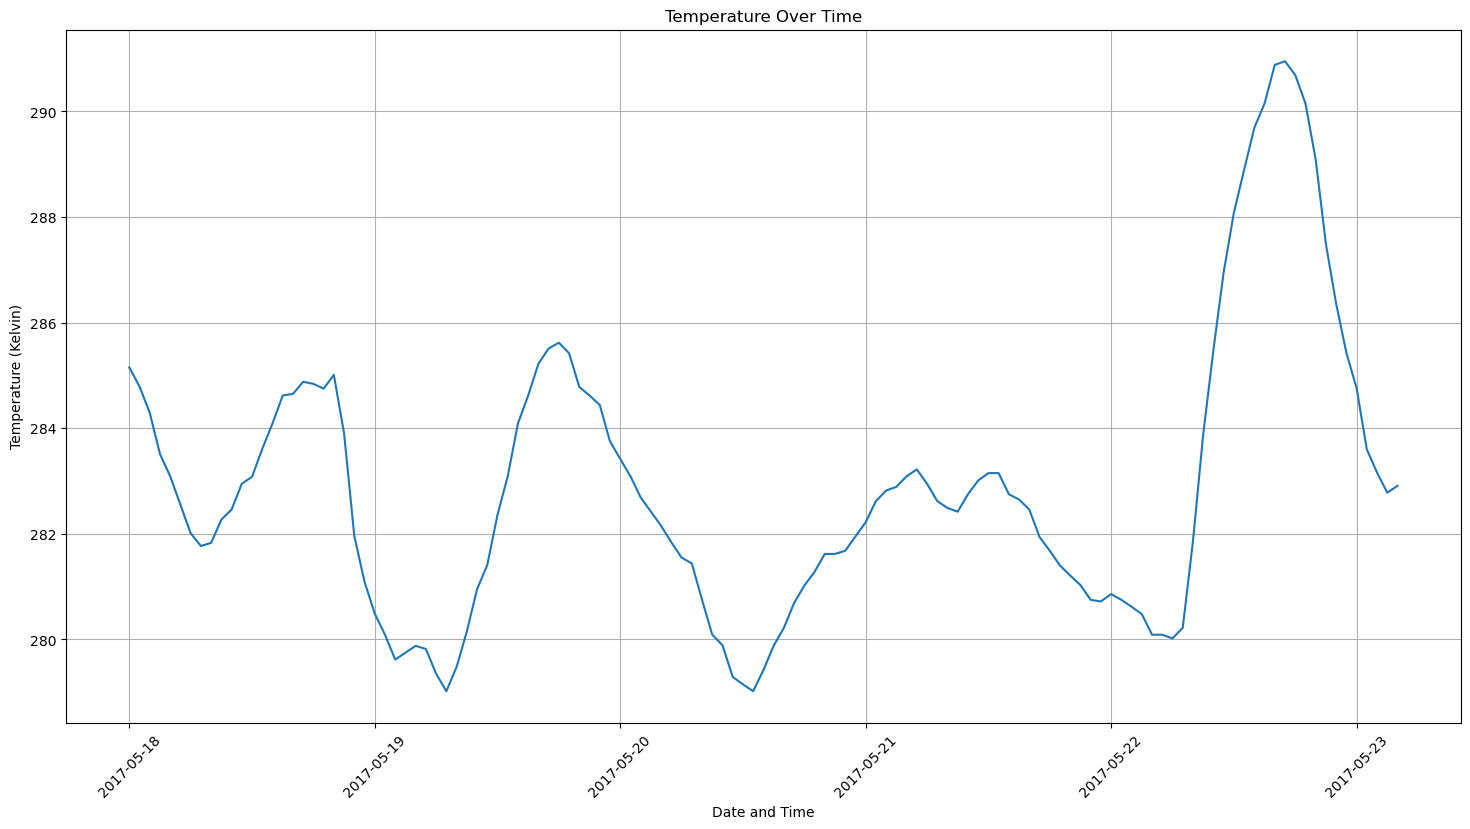

In [10]:
plt.figure(figsize=(18, 9))
sns.lineplot(x='date_time', y='temperature', data=data)
plt.title('Temperature Over Time')
plt.xlabel('Date and Time')
plt.ylabel('Temperature (Kelvin)')
plt.xticks(rotation=45)
plt.grid(True)  # Add a background grid
plt.show()

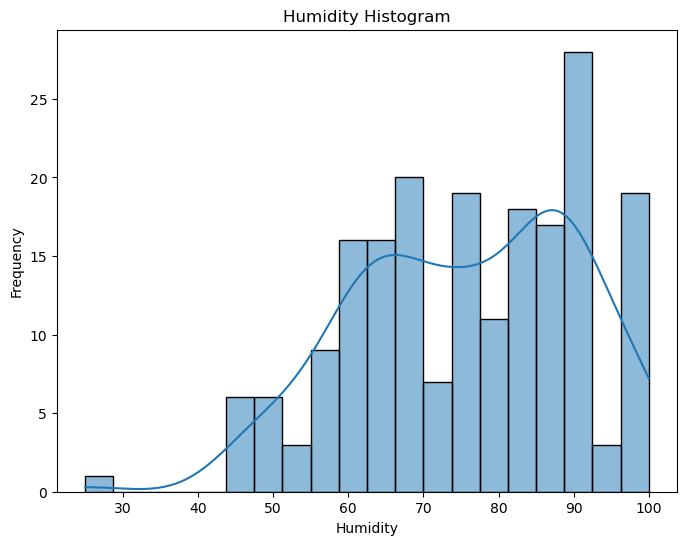

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data['humidity'], bins=20, kde=True)
plt.title('Humidity Histogram')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

In [18]:
numeric_columns = data.select_dtypes(include=[float, int])

In [19]:
corr_matrix = numeric_columns.corr()

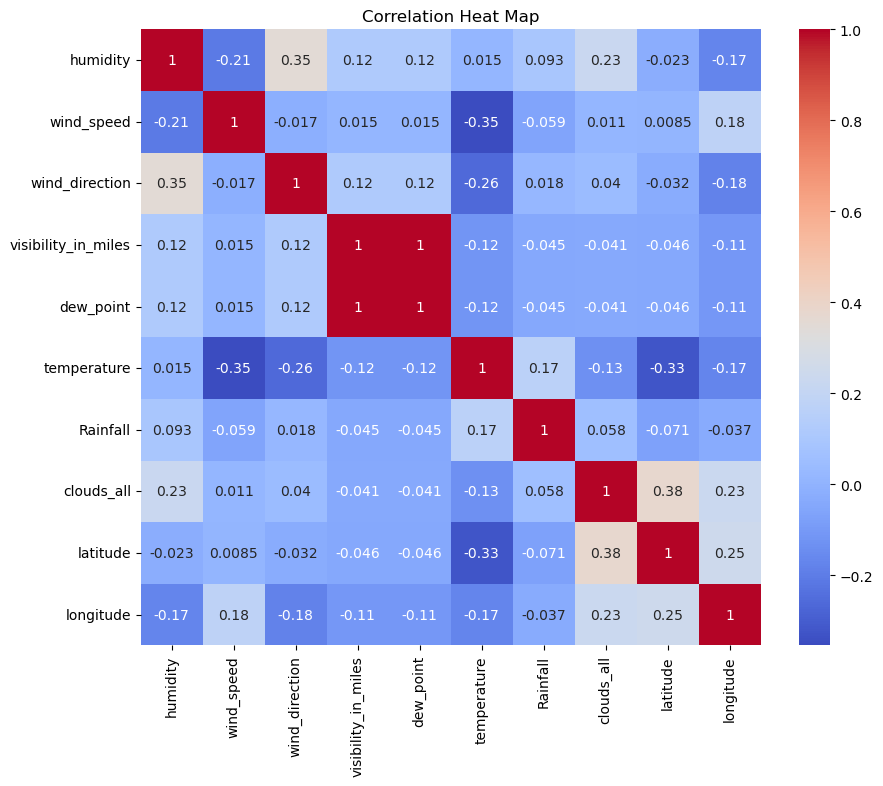

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heat Map')
plt.show()

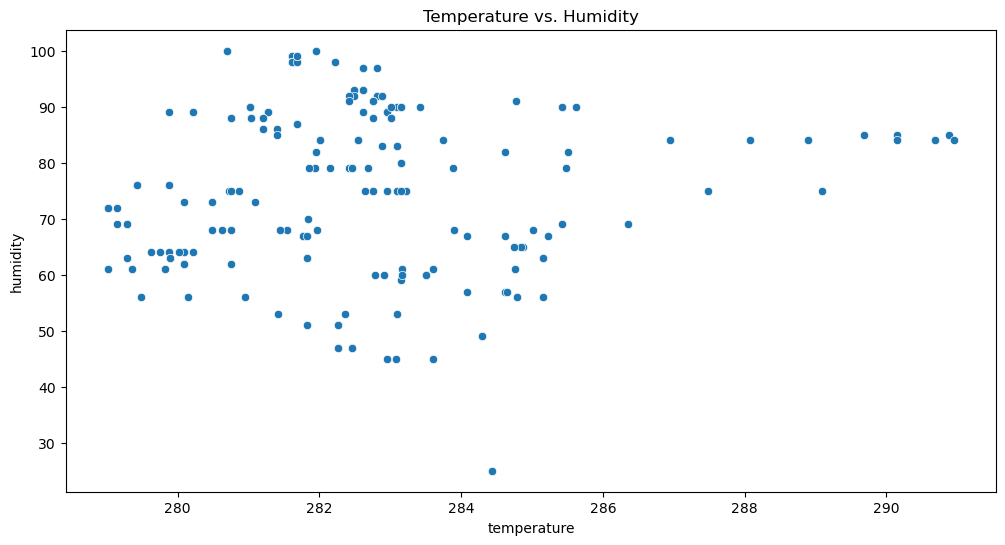

In [21]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="temperature", y="humidity", data=data)
plt.title("Temperature vs. Humidity")
plt.show()


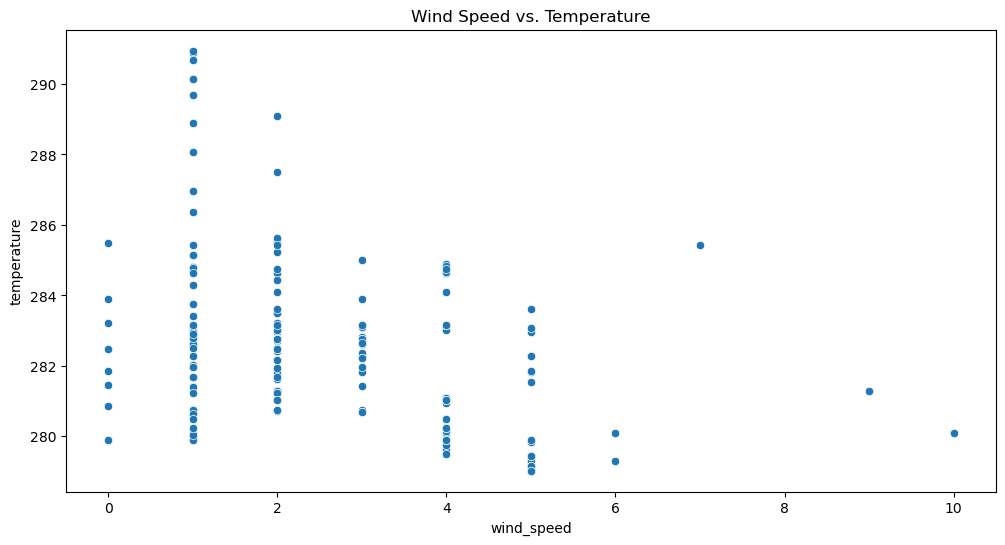

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="wind_speed", y="temperature", data=data)
plt.title("Wind Speed vs. Temperature")
plt.show()

In [27]:
fig = px.scatter_geo(data, locations="country", locationmode="country names",
                     color="temperature", size="humidity",
                     hover_name="country",
                     projection="natural earth",
                     title="Correlation between Country, Temperature, and Humidity")

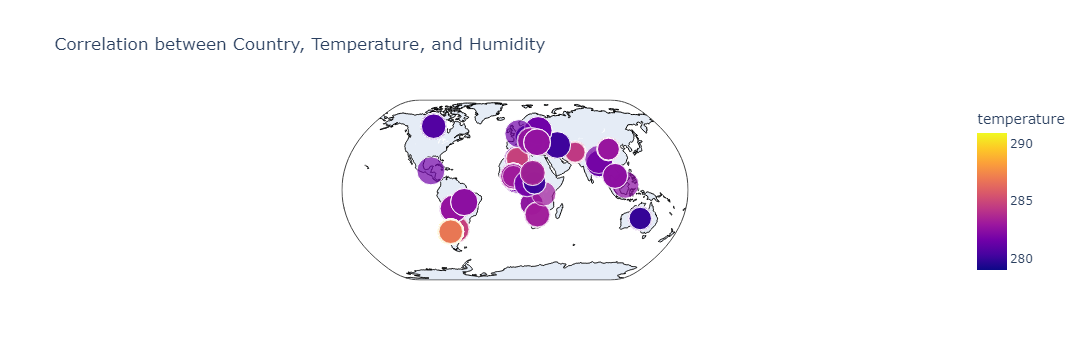

In [32]:
fig.update_geos(showcoastlines=True, coastlinecolor="Black")
fig.show()

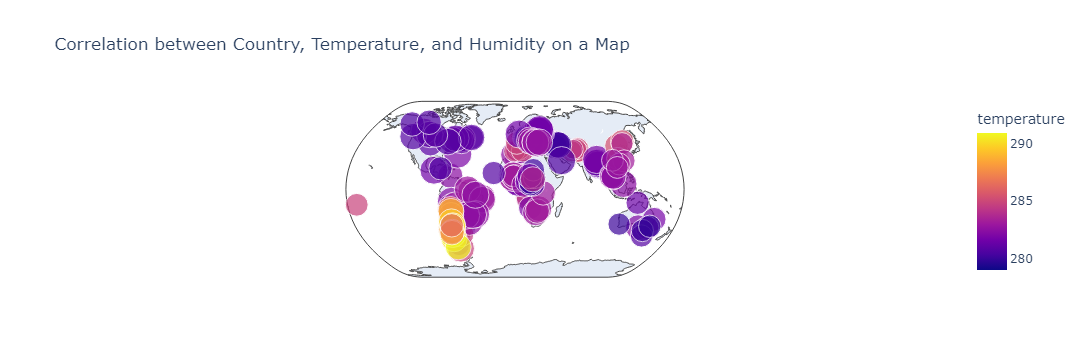

In [33]:
fig = px.scatter_geo(data, 
                     lat="latitude", 
                     lon="longitude", 
                     color="temperature", 
                     size="humidity",
                     hover_name="country",
                     projection="natural earth",
                     title="Correlation between Country, Temperature, and Humidity on a Map")

fig.show()